In [63]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from os.path import join, exists
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [64]:
with open(join(os.getcwd(), "documentation", "baseline_results"), "r") as f:
    lines = f.readlines()
langs = lines[2].split()
classifications = []
for line in lines[3:-2]:
    entry = line.split()
    true_lang = entry[0]
    for idx, val in enumerate(entry[1:]):
        for i in range(int(val)):
            classifications.append(true_lang + " " + langs[idx])

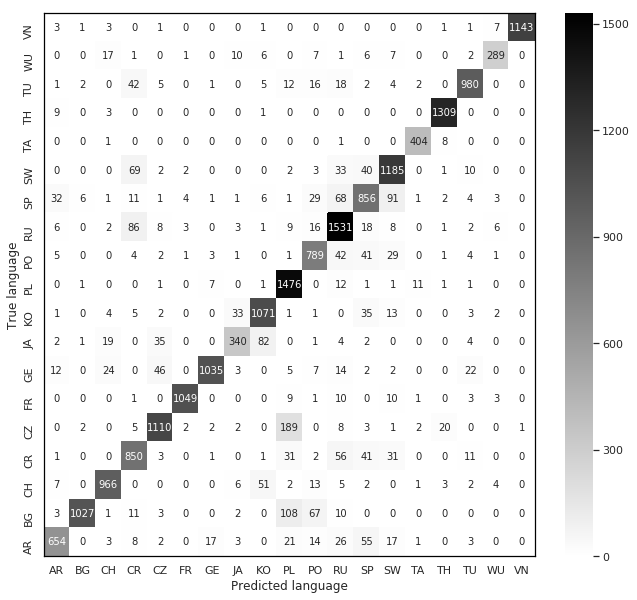

In [71]:
new_class = np.array([[line.split()[0][:2], line.split()[1]] for line in classifications])
y_true = new_class[:,0]
y_pred = new_class[:,1]
conf_matrix = confusion_matrix(y_true, y_pred, labels=langs)
conf_matrix = np.flip(conf_matrix, 0)

plt.figure(figsize=(11,10))
ax = sns.heatmap(conf_matrix, cmap="binary", annot=True, fmt="d")
ticks = []
for i in range(len(langs)):
    ticks.append(i + 0.5)
    
plt.xlabel("Predicted language")
plt.xticks(ticks, labels=langs)
plt.ylabel("True language")
langs.reverse()
plt.yticks(ticks, labels=langs)
for point in ["top", "bottom", "left", "right"]:
    ax.spines[point].set_color('black')
    ax.spines[point].set_visible(True)
    
plt.savefig("conf_matrix_example.pdf", bbox_inches="tight")
plt.show()

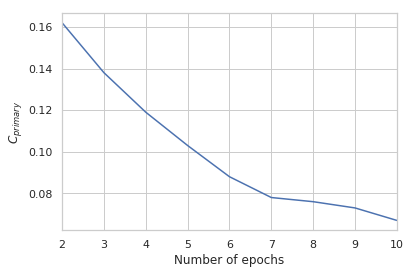

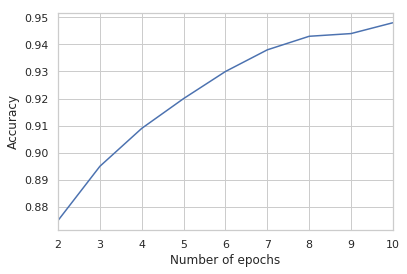

In [28]:
acc_df = pd.DataFrame({'accs': [0.875, 0.895, 0.909, 0.920, 
                                0.930, 0.938, 0.943, 0.944, 0.948]})

c_s_df = pd.DataFrame({'c_s': [0.162, 0.138, 0.119, 0.103, 
                               0.088, 0.078, 0.076, 0.073, 0.067]}) 
epochs_df = pd.DataFrame({'epochs' : [2, 3, 4, 5, 6, 7, 8, 9, 10]})

df = pd.concat([epochs_df, acc_df, c_s_df], axis =1)
sns.set(style="whitegrid")
sns.lineplot(x="epochs", y="c_s", data=df)
plt.ylabel("$C_{primary}$")
plt.xlabel("Number of epochs")
plt.xlim((2,10))
plt.savefig("epochs_expt.pdf",bbox_inches="tight")
plt.show()

plt.clf()
sns.lineplot(x="epochs", y="accs", data=df)
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.xlim((2,10))
plt.savefig("epochs_expt2.pdf",bbox_inches="tight")